In [37]:
#Importation de bibliothèque
import pandas as pd
import numpy as np
! pip install pandas_datareader
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import datetime
%matplotlib inline

In [38]:
# Création des dates à prendre + extraction des données financières des compagnies
start = datetime.datetime(2018, 3, 1)
end = datetime.datetime(2021, 4, 1)
Apple = web.DataReader("AAPL", 'yahoo', start, end)
Microsoft = web.DataReader("MSFT", 'yahoo', start, end)
Xiaomi = web.DataReader("1810.HK", 'yahoo', start, end)
Asus = web.DataReader("2357.TW", 'yahoo', start, end)
Apple.to_csv('Apple_Stock.csv')
Microsoft.to_csv('Microsoft_Stock.csv')
Xiaomi.to_csv('Xiaomi_Stock.csv')
Asus.to_csv('Asus_Stock.csv')

# OPEN PRICE INDUSTRIES INFORMATIQUES

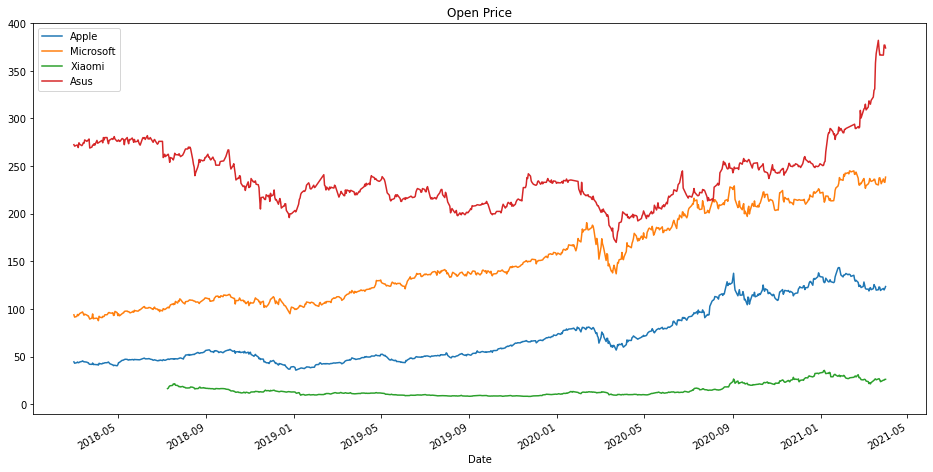

In [39]:
# Graphique des ouvertures
Apple['Open'].plot(label='Apple',figsize=(16,8),title='Open Price')
Microsoft['Open'].plot(label='Microsoft')
Xiaomi['Open'].plot(label='Xiaomi')
Asus['Open'].plot(label='Asus')
plt.legend()

# VOLUME TRADED

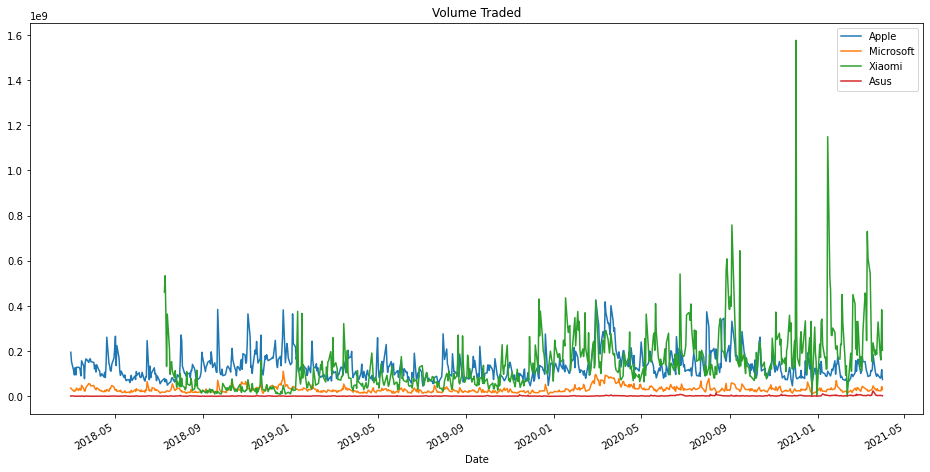

In [40]:
# Graphique des volumes
Apple['Volume'].plot(label='Apple',figsize=(16,8),title='Volume Traded')
Microsoft['Volume'].plot(label='Microsoft')
Xiaomi['Volume'].plot(label='Xiaomi')
Asus['Volume'].plot(label='Asus')
plt.legend()

# ANALYSE DU PLUS GROS INDICE

In [41]:
#Analyse le pic de xiaomi fin 2020
Xiaomi['Volume'].idxmax()

Timestamp('2020-12-02 00:00:00')

In [42]:
Xiaomi

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-07-09,17.000000,16.000000,16.600000,16.799999,462182642,16.799999
2018-07-10,19.340000,17.000000,17.000000,19.000000,534072218,19.000000
2018-07-11,19.799999,18.299999,18.500000,19.000000,374721138,19.000000
2018-07-12,19.700001,19.020000,19.400000,19.260000,132592630,19.260000
2018-07-13,21.799999,19.520000,19.600000,21.450001,364065075,21.450001
...,...,...,...,...,...,...
2021-03-26,26.150000,24.100000,24.200001,25.400000,329482838,25.400000
2021-03-29,25.900000,24.900000,25.450001,25.049999,179420095,25.049999
2021-03-30,25.650000,24.850000,25.500000,25.600000,161314876,25.600000


# TOTAL TRADED

In [43]:
# Création nouvelles données du volume total en valeurs boursières
Apple['Total Traded'] = Apple['Open']*Apple['Volume']
Microsoft['Total Traded'] = Microsoft['Open']*Microsoft['Volume']
Xiaomi['Total Traded'] = Xiaomi['Open']*Xiaomi['Volume']
Asus['Total Traded'] = Asus['Open']*Asus['Volume']

Text(0, 0.5, 'Total Traded')

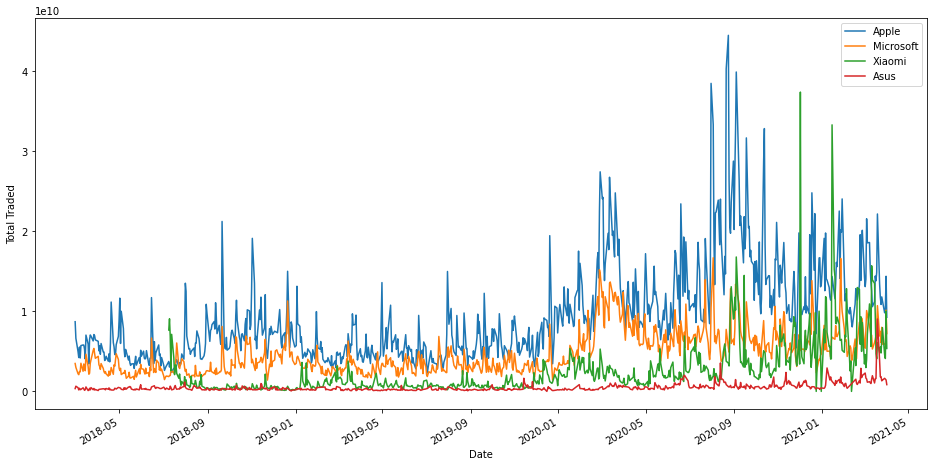

In [44]:
# Graphique du volume total des valeurs boursières
Apple['Total Traded'].plot(label='Apple',figsize=(16,8))
Microsoft['Total Traded'].plot(label='Microsoft')
Xiaomi['Total Traded'].plot(label='Xiaomi')
Asus['Total Traded'].plot(label='Asus')
plt.legend()
plt.ylabel('Total Traded')

# MOVING AVERAGE XIAOMI

<AxesSubplot:xlabel='Date'>

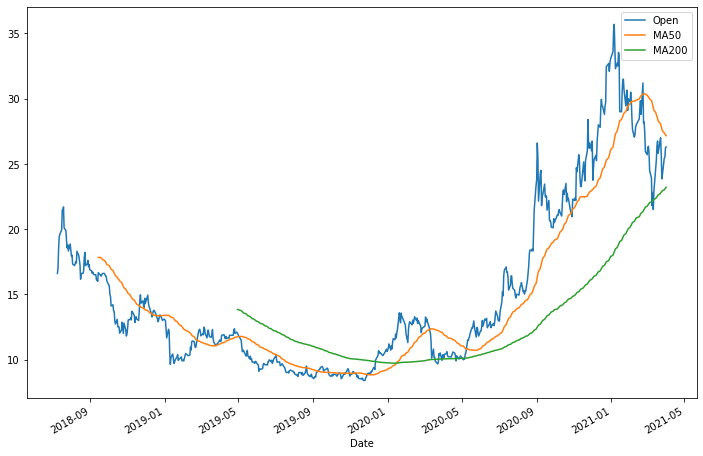

In [45]:
# Création d'un graphique des moyennes mobiles(MA - Moving Averages) de Xiaomi
Xiaomi['MA50']=Xiaomi['Open'].rolling(50).mean()
Xiaomi['MA200']=Xiaomi['Open'].rolling(200).mean()
Xiaomi[['Open','MA50','MA200']].plot(figsize=(12,8),label=('Xiaomi'))

# SCATTER MATRIX


In [46]:
# analyse des relations par diagramme dispersions des prix
# importation package 
from pandas.plotting import scatter_matrix

In [47]:
# Création d'une concaténation de toutes les actions
ac_comp = pd.concat([Apple['Open'],Microsoft['Open'],Xiaomi['Open'], Asus['Open']],axis=1)
ac_comp.columns = ['Apple Open','Microsoft Open','Xiaomi Open', 'Asus Open']

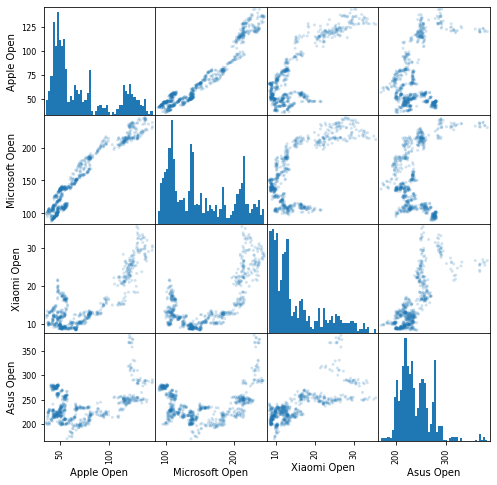

In [48]:
# Vous pouvez utiliser un point-virgule pour supprimer l'impression des axes
scatter_matrix(ac_comp,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

# Xiaomi Format candle
# Code recopié

Requirement already up-to-date: mplfinance in c:\users\romain\anaconda3\lib\site-packages (0.12.7a17)


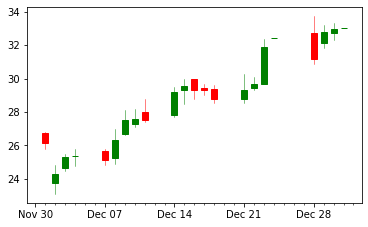

In [62]:
# from mpl_finance import candlestick_ohlc
# Maj mpl_finance devient mplfinance - pip install --upgrade mplfinance 
! pip install mplfinance 
! pip install --upgrade mplfinance 
#from mplfinance import candlestick_ohlc
from mplfinance.original_flavor import candlestick_ohlc

from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY

# Réinitialiser l'index pour obtenir une colonne des dates de janvier
Xiaomi_reset = Xiaomi.loc['2020-12':'2020-12'].reset_index()

# Créer une nouvelle colonne de valeurs numériques de "date" à utiliser par matplotlib
Xiaomi_reset['date_ax'] = Xiaomi_reset['Date'].apply(lambda date: date2num(date))
Xiaomi_values = [tuple(vals) for vals in Xiaomi_reset[['date_ax', 'Open', 'High', 'Low', 'Close']].values]

mondays = WeekdayLocator(MONDAY) # major ticks on the mondays
alldays = DayLocator() # minor ticks on the days
weekFormatter = DateFormatter('%b %d') # e.g., Jan 12
dayFormatter = DateFormatter('%d') # e.g., 12

# Tracé
fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)

candlestick_ohlc(ax, Xiaomi_values, width=0.6, colorup='g',colordown='r');

# Rendement quotidien en pourcentage [rt = (pt/pt-1)-1]

In [69]:
# Calcul r_t (rendement à l'instant t) comme étant égal au prix à l'instant t divisé par le prix à l'instant t-1 (la veille) moins 1.
# pourcentage de gain (ou de perte) si vous avez acheté l'action le jour et l'avez ensuite vendue le lendemain "Pour la volatilité"
# Méthode 1: en utilisant shift
Apple['returns'] = (Apple['Close'] / Apple['Close'].shift(1) ) - 1
# méthode 2: en utilisant pct_change
Apple['returns'] = Apple['Close'].pct_change(1)
Microsoft['returns'] = Microsoft['Close'].pct_change(1)
Xiaomi['returns'] = Xiaomi['Close'].pct_change(1)
Asus['returns'] = Asus['Close'].pct_change(1)
Apple

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns
Date,,,,,,,,
2018-03-01,44.945000,43.165001,44.634998,43.750000,195208000.0,42.209846,8.713109e+09,NaN
2018-03-02,44.075001,43.112499,43.200001,44.052502,153816000.0,42.501698,6.644851e+09,0.006914
2018-03-05,44.435001,43.630001,43.802502,44.205002,113605600.0,42.648827,4.976209e+09,0.003462
2018-03-06,44.562500,44.032501,44.477501,44.167500,95154000.0,42.612656,4.232212e+09,-0.000848
2018-03-07,43.962502,43.567501,43.735001,43.757500,126814000.0,42.217075,5.546210e+09,-0.009283
...,...,...,...,...,...,...,...,...
2021-03-26,121.480003,118.919998,120.349998,121.209999,93958900.0,121.209999,1.130795e+10,0.005141
2021-03-29,122.580002,120.730003,121.650002,121.389999,80819200.0,121.389999,9.831656e+09,0.001485
2021-03-30,120.400002,118.860001,120.110001,119.900002,85671900.0,119.900002,1.029005e+10,-0.012274


# Les histogrammes du rendement quotidien

<AxesSubplot:>

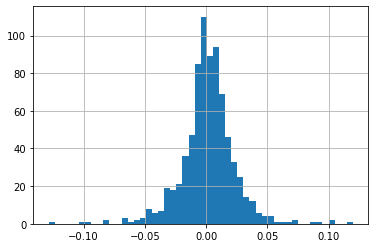

In [89]:
Apple['returns'].hist(bins=50)


<AxesSubplot:>

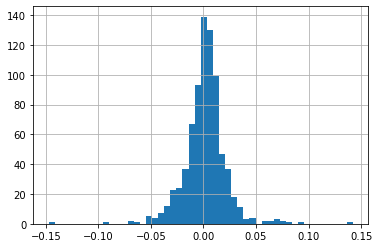

In [90]:
Microsoft['returns'].hist(bins=50)


<AxesSubplot:>

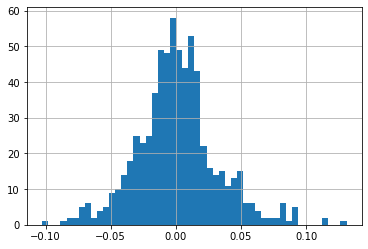

In [92]:
Xiaomi['returns'].hist(bins=50)


<AxesSubplot:>

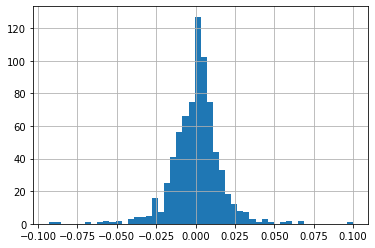

In [93]:
Asus['returns'].hist(bins=50)

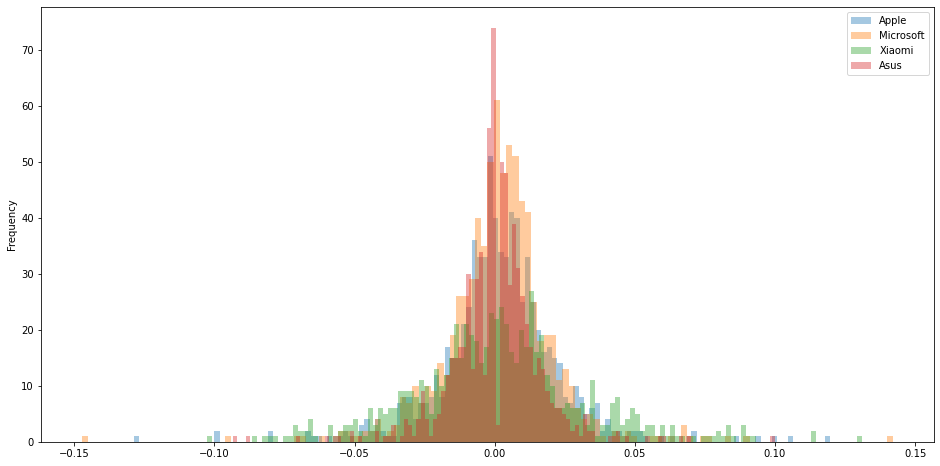

In [96]:
#Histogramme ensemble
# On rajoute .plot avant .hist pour supprimer les grilles
Apple['returns'].plot.hist(bins=130,label='Apple',figsize=(16,8),alpha=0.4)
Microsoft['returns'].plot.hist(bins=130,label='Microsoft',alpha=0.4)
Xiaomi['returns'].plot.hist(bins=130,label='Xiaomi',alpha=0.4)
Asus['returns'].plot.hist(bins=130, label='Asus',alpha=0.4)
plt.legend()

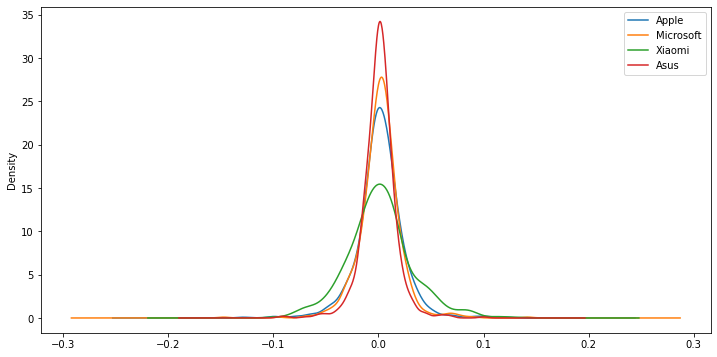

In [97]:
# Histogramme sous forme KDE (densité)
# ici on définit le graphique avec kind pour obtenir un graphique différent)
Apple['returns'].plot(kind='kde',label='Apple',figsize=(12,6))
Microsoft['returns'].plot(kind='kde',label='Microsoft')
Xiaomi['returns'].plot(kind='kde',label='Xiaomi')
Asus['returns'].plot(kind='kde',label='Asus')
plt.legend()

<AxesSubplot:>

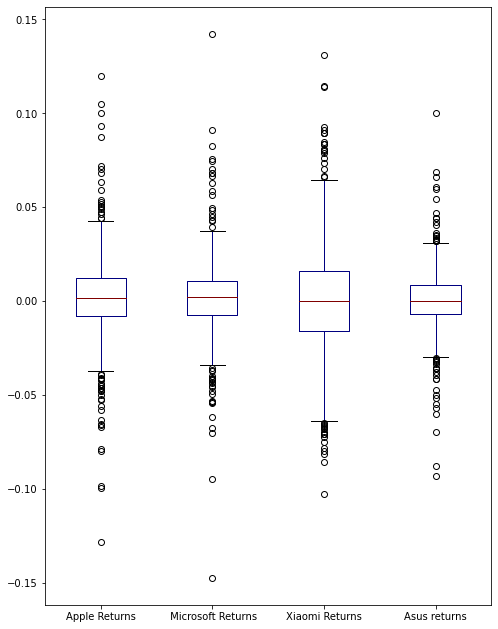

In [99]:
# Sous forme de box
box_df = pd.concat([Apple['returns'],Microsoft['returns'],Xiaomi['returns'],Asus['returns']],axis=1)
box_df.columns = ['Apple Returns',' Microsoft Returns','Xiaomi Returns','Asus returns']
box_df.plot(kind='box',figsize=(8,11),colormap='jet')

# Comparaison des rendements quotidiens entre les actions¶

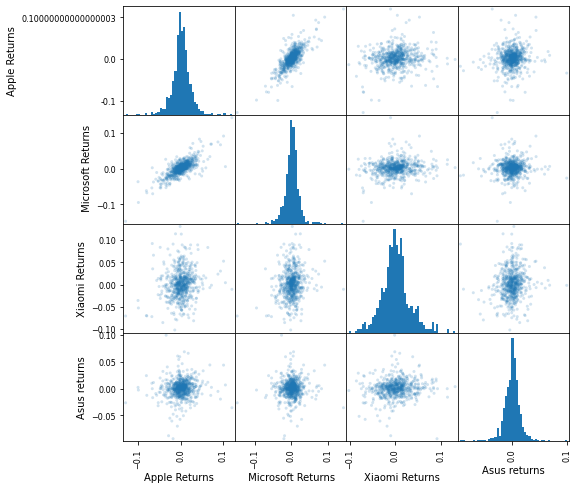

In [101]:
# On observe comment les entreprises sont-elles liées en comparaison avec l'industrie
scatter_matrix(box_df,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});


<AxesSubplot:xlabel='Apple Returns', ylabel=' Microsoft Returns'>

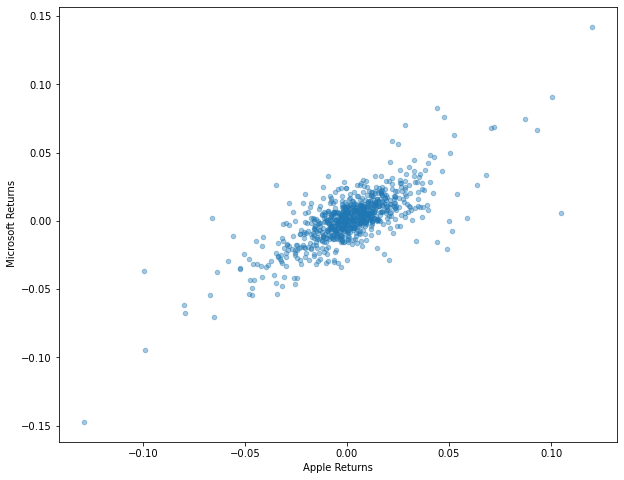

In [116]:
# tracons la relation entre Apple et Asus
box_df.plot(kind='scatter',x='Apple Returns',y=' Microsoft Returns',alpha=0.4,figsize=(10,8))

# Rendements quotidiens cumulatifs¶

In [118]:
# Calcul rendement quotidien cumulatif
Apple['Cumulative Return'] = (1 + Apple['returns']).cumprod()
Microsoft['Cumulative Return'] = (1 + Microsoft['returns']).cumprod()
Xiaomi['Cumulative Return'] = (1 + Xiaomi['returns']).cumprod()
Asus['Cumulative Return'] = (1 + Asus['returns']).cumprod()
Apple

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns,Cumulative Return
Date,,,,,,,,,
2018-03-01,44.945000,43.165001,44.634998,43.750000,195208000.0,42.209846,8.713109e+09,NaN,NaN
2018-03-02,44.075001,43.112499,43.200001,44.052502,153816000.0,42.501698,6.644851e+09,0.006914,1.006914
2018-03-05,44.435001,43.630001,43.802502,44.205002,113605600.0,42.648827,4.976209e+09,0.003462,1.010400
2018-03-06,44.562500,44.032501,44.477501,44.167500,95154000.0,42.612656,4.232212e+09,-0.000848,1.009543
2018-03-07,43.962502,43.567501,43.735001,43.757500,126814000.0,42.217075,5.546210e+09,-0.009283,1.000171
...,...,...,...,...,...,...,...,...,...
2021-03-26,121.480003,118.919998,120.349998,121.209999,93958900.0,121.209999,1.130795e+10,0.005141,2.770514
2021-03-29,122.580002,120.730003,121.650002,121.389999,80819200.0,121.389999,9.831656e+09,0.001485,2.774629
2021-03-30,120.400002,118.860001,120.110001,119.900002,85671900.0,119.900002,1.029005e+10,-0.012274,2.740571


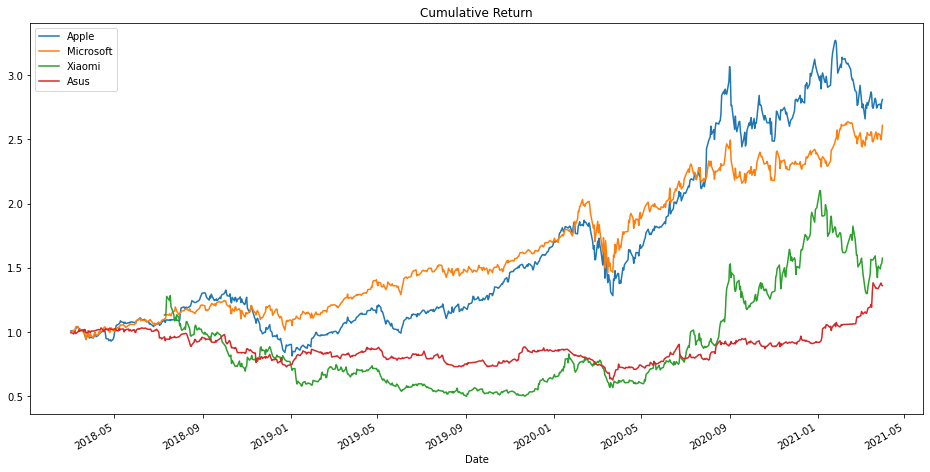

In [119]:
# Histogramme du rendement quotidien cumulatif
Apple['Cumulative Return'].plot(label='Apple',figsize=(16,8),title='Cumulative Return')
Microsoft['Cumulative Return'].plot(label='Microsoft')
Xiaomi['Cumulative Return'].plot(label='Xiaomi')
Asus['Cumulative Return'].plot(label='Asus')
plt.legend()

In [ ]:
# Conclusion 
# Xiaomi est l'action la plus volatile avec des mouvements balancants entre perte et gain 
# Apple est celle qui accumule le plus de capitalisation boursière suivi de près par Xiaomi dans ses grands mouvements
# Apple suivi de près par microsoft sont les actions qui rapportent le plus de rendement cumulé
# Asus est la moins volatile avec un faible rendement avec Xiaomi
